# A Regression Analysis of Students' Academic Performance in Secondary Education

### Background and Problem to be Solved

What aspects of schooling and parenting are important? What are the key factors that affect school performance? Will alcohol intake directly affect a student’s academic performance? For many of us, adolescence is the point when we become independent person and make crucial decisions on our own. Opportunities for higher education and career development is heavily relied on the academia output. 
 
In this project, I would like to identify the factors among a student’s socioeconomic status, study attitude, school that impact the students’ school performance most, especially to check if alcohol use will affect students’ grades, with support of real-world data.
I will also investigate machine learning techniques used for solving regression problems. By analyzing data of students under secondary education in Portugal, I will compare techniques among KNNs, SVR, Linear Regression and Trees, and evaluate their predicting power of a student’s final grade.

### Data

The data is collected by Fabio Pagnotta and Hossain Mohammad Amran3,4 from University of Camerino. The data can be accessed through UCI Machine Learning Repository:
 
https://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION
 
The data covers alcohol usage of a group of students under secondary education in Portugal along with their social, gender, study time, and school performance information. The dataset consists of two subdatasets with contributes for both Math (student-mat.csv) and Portuguese language (tudent-por.csv) classes. Each dataset has 32 variables with detailed explanation in “student.txt”. There are 395 students for Math class and 649 students for Portuguese, of which 382 students took both.

 Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:

    1 school - student's school (binary: "GP" - Gabriel Pereira or "MS" - Mousinho da Silveira)
    2 sex - student's sex (binary: "F" - female or "M" - male)
    3 age - student's age (numeric: from 15 to 22)
    4 address - student's home address type (binary: "U" - urban or "R" - rural)
    5 famsize - family size (binary: "LE3" - less or equal to 3 or "GT3" - greater than 3)
    6 Pstatus - parent's cohabitation status (binary: "T" - living together or "A" - apart)
    7 Medu - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    8 Fedu - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
    9 Mjob - mother's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    10 Fjob - father's job (nominal: "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other")
    11 reason - reason to choose this school (nominal: close to "home", school "reputation", "course" preference or "other")
    12 guardian - student's guardian (nominal: "mother", "father" or "other")
    13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
    14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
    15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
    16 schoolsup - extra educational support (binary: yes or no)
    17 famsup - family educational support (binary: yes or no)
    18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
    19 activities - extra-curricular activities (binary: yes or no)
    20 nursery - attended nursery school (binary: yes or no)
    21 higher - wants to take higher education (binary: yes or no)
    22 internet - Internet access at home (binary: yes or no)
    23 romantic - with a romantic relationship (binary: yes or no)
    24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
    25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
    26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
    27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
    28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
    29 health - current health status (numeric: from 1 - very bad to 5 - very good)
    30 absences - number of school absences (numeric: from 0 to 93)

    These grades are related with the course subject, Math or Portuguese:
    31 G1 - first period grade (numeric: from 0 to 20)
    31 G2 - second period grade (numeric: from 0 to 20)
    32 G3 - final grade (numeric: from 0 to 20, output target)

### Data Wrangling

#### Target variable

I use G3, the final grade related with the course subject, Math or Portuguese, as the indicator of the students’ school performance.

In order to check if math and Portuguese grades are comparable, I identified students who took both courses, and plotted average Portuguese score (of G1, G2, and G3) over average Math score. In this plot, students with higher math score also tend to have higher Portuguese score. 

![image1.png](img\image1.png)


By observing the positive correlation, an OLS regression analysis was followed. With R-squared of only 0.341, the model shows weak robustness. However with p-values of both constant and coefficient close to zero, the positive correlatin between average scores of the two courses is statistically significant.

The OLS regression estimates give G3_P = G3_M*0.3931 + 8.1004.

Target variable G is defined as following:
- For students in Math class only, G = G3_M*0.3931 + 8.1004
- For studnets in Portuguese class only, G = G3_P
- For students in both classes, G = (G3_P + G3_M*0.3931 + 8.1004)/2

#### Merge subdatasets

To explore any patterns of factors may associated with students’ school performance, I combined the two subdatasets, 'student-mat.csv' and 'student-por.csv'. To avoid the case that same students may appeared twice in the merged datasets, I firstly identified a sub dataset of students that belong to both datasets. For students who took both courses, an estimated G3 will be calculated using G = (G3_P + G3_M*0.3931 + 8.1004)/2. 

Next, I concatenated three subdatasets generating an initial input dataset. 
- students that took Math only;
- students that took Portuguese only; and
- students that took both courses.

#### Predictor variables

New variables created: 
 
    “Subject” - measures which course a student was taking. (“M” - Math, “P” - Portuguese, and “B”- both)
 
    “Aalc” - measures daily alcohol consumption was generated using formula Aalc = (Dalc*5 + Walc*2)/7. (Dalc - workday alcohol consumption. Walc - weekend alcohol consumption)

Any variables that irrelevant to the study were dropped: 

    “G1”, “G2”, "G3", “paid”, “Dalc”, and “Walc”. 
 
In the new preprocessed data “INPUTdf”, the sum of missing data for each column is zero, meaning there is no missing values. 
 
By looking into histograms of G3 and Aalc, the two major continuous variables in the dataset, there is also no outliers. 

### EDA and Summary Statistics

Estimated final grade, G, has a bell-shaped distribution curve that is centered around 11. By separating G with course subject, we will notice that only a few students were taking math only (Subject = M), while students taking Portuguese only (Subject = P) and taking both (Subject = B) have similar counts. Except that some students with Subject equals “P” got zeros, students with different Subject values show similar distribution pattern of G with similar range. Thus values in G is comprable across different values of Subject.

![image2.png](img\image2.png)
![image3.png](img\image3.png)

<img src="../image1.png" />

Average daily alcohol consumption level, Aalc, was generated to measure a student’s alcohol intake level. The histogram shows most students on daily average took a very low volume of alcohol, and the number of students decrease while Aalc moves up.

![image4.png](/img/image4.png)

By plotting G over Aalc, it shows a negative correlation, meaning either the alcohol consumption has negative effects on school performance, or students who are not doing well in school tend to drink more.

![image5.png](img\image5.png)

To explore if any feature may correlate with G, I obtained swarm plots using seaborn. This style of plots is often called a”beeswarm”, meaning a categorical statterplot with non-overlapping points. This kind of plots shows relationship between two variables, and in the meanwhile gives a better representation of the distribution of values. Among my swarm plots, features that reveal correlation to target variable, G, are “failures” and “higher”, while most other features do not show any obvious relationship with G.

Students with less failures in the past are more likely to have higher G.

![imag6e.png](img/image6.png)

Students who are willing to get higher grades will have a higher G. Of course! Actually I am surprised that so many students do not show movitation to get higher grades.

![image7.png](img/image7.png)

### Data Preprocessing
The target variable (y) is 3. I include all rest variables as  predictors (X). 
 
For binary variables from the original datasets, I replaced “yes”/”no” values with 1/0. The converted variables are listed in below.
school - student's school (1 - Gabriel Pereira or 0 - Mousinho da Silveira)

    sex - student's sex (1 - female or 0 - male).
    address - student's home address type (1 - urban or 0 - rural).
    famsize - family size (1 - less or equal to 3 or 0 - greater than 3).
    Pstatus - parent's cohabitation status (1- living together or 0 - apart).
    schoolsup - extra educational support (1- yes or 0 - no).
    famsup - family educational support (1- yes or 0 - no).
    activities - extra-curricular activities (1- yes or 0 - no).
    nursery - attended nursery school (1- yes or 0 - no).
    higher - wants to take higher education (1- yes or 0 - no).
    internet - Internet access at home (1- yes or 0 - no).
    romantic - with a romantic relationship (1- yes or 0 - no).
 
Next, I dummy coded any nominal categorical variables in X. This will improve model performance by eliminating any relationships form the statistical stories of nominal variables. 
Nominal variables are listed as the following. 
 
    Subject - The course a student was taking. (“M” - Math, “P” - Portuguese, and “B”- both).
    Mjob - mother's job ("teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    Fjob - father's job ( "teacher", "health" care related, civil "services" (e.g. administrative or police), "at_home" or "other").
    reason - reason to choose this school (close to "home", school "reputation", "course" preference or "other").
    guardian - student's guardian ( "mother", "father" or "other").
    
In the modeling process, I uniformly randomly splitted the data into 70% of training data set and 30% of test data set. The training set will be used to build a predicting model, and the test data set will be used to test model accuracy. The goal is to build a model that is able to generalize from training set to test set as accurately as possible.

At this point, the data is ready for decision tree, random forest, and gradient boosting. 

SVM, KNN, and linear models are very sensitive to the scaling of the data. There are several methods to transform the data that yield more standard ranges. In this project, I will use the MinMaxScaler that shifts the data such that all features are exactly between 0 and 1.

In particular, I scaled only the non-dummy variables in training dataset, and combined the scaled sub data set back to the dummy variables in the training data set. The same steps have been followed to the test dataset. So the datasets are ready for initial modeling. 

### Result

Results from tuning each model.

|      | ML Technique     | Training Score | Test Score |Parameters                       |
|------|----------------  |----------------|----------------------------------------------|
|   1  | Random Forest	  | 0.603	       |0.235	    |max_depth=5, n_nestimators=1000  |
|   2  	|Gradient Boosting Machines	|0.538|0.231|max_depth=3, n_nestimators=10,learning_rate=0.4|
| 3 | Decision Tree	|0.213	|0.195	|max_depth=2|
| 4 |Ridge Regression	|0.247	|0.176|	alpha=10|
|5	|SVR	|0.671	|0.174	|kernel =rbf, gamma=0.1, C=10|
|6|	Lasso Regression|	0.263|	0.155|	alpha=0.01|
|7|	KNN|	0.219	|0.129|	n_neighbors=24|

Ensemble of decision trees, i.e. random forest and gradient boosting regression trees, give the best estimate. The beauty of these tree-based algorithm is that they work well on a mixture of binary and continuous features without scaling. 

Feature importances computed from the random forest regressor giving highest test score. "failures" and "absences" are the most important features.

![image8.png](img\image8.png)

Feature importances computed from the gradient boosting regressor giving highest test score. "absences", "failures", and "Medu" are identified as the most important features.
![image9.png](img\image9.png)

### Discussion

These models overall have weak predicting power, showing the highest test score of only 0.235. 

There is weak correlation between selected features and G. This was also reflected in the exploratory data analysis section. The 2D scatterplots showing a slightly weak trend indicating lack of predictability of the data itself. 

The predictor variables may be cross correlated.

Target variable G has bias in estimation.

### Reference

Hingson, R.W.; Zha, W.; and Weitzman, E.R. Magnitude of and trends in alcohol-related mortality and morbidity among U.S. college students ages 18–24, 1998–2005. Journal of Studies on Alcohol and Drugs (Suppl. 16):12–20, 2009. PMID: 19538908 http://www.ncbi.nlm.nih.gov/pmc/articles/PMC2701090/

http://www.cehd.umn.edu/fsos/projects/alcohol/consequences.asp

P. Cortez and A. Silva. Using Data Mining to Predict Secondary School Student Performance. In A. Brito and J. Teixeira Eds., Proceedings of 5th FUture BUsiness TEChnology Conference (FUBUTEC 2008) pp. 5-12, Porto, Portugal, April, 2008, EUROSIS, ISBN 978-9077381-39-7.

F. Pagnotta, H.M. Amran. Using Data Mining To Predict Secondary School Student Alcohol Consumption. , Department of Computer Science,University of Camerino.


# Code

Import modules.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import cross_validation
from sklearn import datasets
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler 
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import cross_val_score

/Users/jinghao/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/jinghao/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Load "student-mat.csv" as Mdf and "student-por.csv" as Pdf.

In [3]:
Mdf = pd.read_csv('student-mat.csv',sep=';')
Pdf = pd.read_csv('student-por.csv',sep=';')

Check dimension of each data set.

In [4]:
Mdf.shape

(395, 33)

In [5]:
Pdf.shape

(649, 33)

Add column "Subject" that describes which course the student has taken.

In [6]:
Mdf['Subject'] = 'M'
Pdf['Subject'] = 'P'

Identify students who took both Math and Portuguese classes.

In [7]:
df = pd.merge(Mdf,Pdf,on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], suffixes=('_M','_P'))
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime_P,goout_P,Dalc_P,Walc_P,health_P,absences_P,G1_P,G2_P,G3_P,Subject_P
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,P
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,P
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,P
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,P
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,P


Update "Subject" with "B", meaning students took both courses.

In [8]:
df['Subject'] = 'B'

To check if grades from two classes are comparable, I plot average Portuguese score (of G1, G2, and G3) over average math score for each student who took two classes.

[<matplotlib.text.Text at 0x1200b06a0>, <matplotlib.text.Text at 0x12018cef0>]

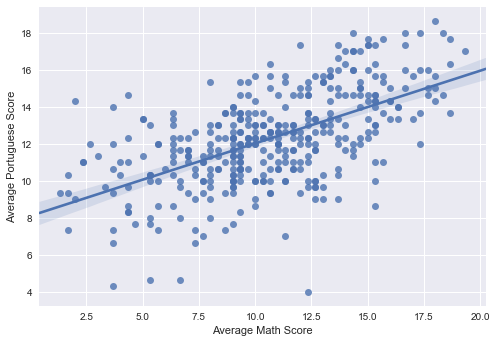

In [100]:
x = (df.G1_M+df.G2_M+df.G3_M)/3
y = (df.G1_P+df.G2_P+df.G3_P)/3
ax = sns.regplot (x,y)
ax.set(xlabel='Average Math Score', ylabel='Average Portuguese Score')

OLS regression of average Portugese score over average math score.

In [10]:
import statsmodels.formula.api as sm
import statsmodels.tools
X = np.array(x)
Y = np.array(y)
model = sm.OLS(y, statsmodels.tools.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.340
Method:                 Least Squares   F-statistic:                     196.9
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           2.46e-36
Time:                        12:03:14   Log-Likelihood:                -817.08
No. Observations:                 382   AIC:                             1638.
Df Residuals:                     380   BIC:                             1646.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1004      0.317     25.590      0.0

Identify target variable G in df, of which the students took two courses.

In [11]:
df.loc[:,'G'] = 0.5 * ((df.G3_M * 0.3831 + 8.1004) + df.G3_M)

In [12]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian_M', 'traveltime_M', 'studytime_M',
       'failures_M', 'schoolsup_M', 'famsup_M', 'paid_M', 'activities_M',
       'nursery', 'higher_M', 'internet', 'romantic_M', 'famrel_M',
       'freetime_M', 'goout_M', 'Dalc_M', 'Walc_M', 'health_M', 'absences_M',
       'G1_M', 'G2_M', 'G3_M', 'Subject_M', 'guardian_P', 'traveltime_P',
       'studytime_P', 'failures_P', 'schoolsup_P', 'famsup_P', 'paid_P',
       'activities_P', 'higher_P', 'romantic_P', 'famrel_P', 'freetime_P',
       'goout_P', 'Dalc_P', 'Walc_P', 'health_P', 'absences_P', 'G1_P', 'G2_P',
       'G3_P', 'Subject_P', 'Subject', 'G'],
      dtype='object')

Merge the updated dataset df back to Mdf, and generate a dataset consists of students who took math only, and who took two courses.

In [13]:
#Mdf2 has the portion of df that only comes from Mdf.
Mdf2 = df.drop(['guardian_P', 'traveltime_P',
       'studytime_P', 'failures_P', 'schoolsup_P', 'famsup_P', 'paid_P',
       'activities_P', 'higher_P', 'romantic_P', 'famrel_P', 'freetime_P',
       'goout_P', 'Dalc_P', 'Walc_P', 'health_P', 'absences_P', 'G1_P', 'G2_P',
       'G3_P', 'Subject_P','Subject_M'], axis=1)
#rename columns of Mdf2 the same as Mdf so that we can combine them.
Mdf2.columns = (['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'G'])
#combine Mdf2 and Mdf, and drop the duplicates
Mdf_new = pd.concat([Mdf, Mdf2])
Mdf_new = Mdf_new.drop_duplicates(['Dalc', 'Fedu', 'Fjob', 'G1', 'G2', 'G3', 'Medu', 'Mjob', 'Pstatus', 'Walc', 'absences', 'activities', 'address', 'age',
       'failures', 'famrel', 'famsize', 'famsup', 'freetime', 'goout',
       'guardian', 'health', 'higher', 'internet', 'nursery', 'paid',
       'reason', 'romantic', 'school', 'schoolsup', 'sex', 'studytime',
       'traveltime'], keep='last')

Update G in Mdf_new. For students only taking Math, G = G3_M*0.3931 + 8.1004.

In [14]:
Mdf_new.G = Mdf_new.G.fillna(Mdf_new['G3'] * 0.3931 + 8.1004)

In [15]:
Mdf_new.describe()

,Dalc,Fedu,G,G1,G2,G3,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,1.481013,2.521519,11.326318,10.908861,10.713924,10.415190,2.749367,2.291139,5.708861,16.696203,0.334177,3.944304,3.235443,3.108861,3.554430,2.035443,1.448101
std,0.890741,1.088201,3.114539,3.319195,3.761505,4.581443,1.094735,1.287897,8.003096,1.276043,0.743651,0.896659,0.998862,1.113278,1.390303,0.839240,0.697505
min,1.000000,0.000000,4.050200,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,9.928375,8.000000,9.000000,8.000000,2.000000,1.000000,0.000000,16.000000,0.000000,4.000000,3.000000,2.000000,3.000000,1.000000,1.000000
50%,1.000000,2.000000,11.657250,11.000000,11.000000,11.000000,3.000000,2.000000,4.000000,17.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,1.000000
75%,2.000000,3.000000,13.731900,13.000000,13.000000,14.000000,4.000000,3.000000,8.000000,18.000000,0.000000,5.000000,4.000000,4.000000,5.000000,2.000000,2.000000
max,5.000000,4.000000,17.881200,19.000000,19.000000,20.000000,4.000000,5.000000,75.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


In [16]:
Pdf2 = df.drop(['guardian_M', 'traveltime_M', 'studytime_M',
       'failures_M', 'schoolsup_M', 'famsup_M', 'paid_M', 'activities_M',
       'higher_M', 'romantic_M', 'famrel_M',
       'freetime_M', 'goout_M', 'Dalc_M', 'Walc_M', 'health_M', 'absences_M',
       'G1_M', 'G2_M', 'G3_M', 'Subject_M', 'Subject_P'], axis=1)
Pdf2.columns = (['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'nursery', 'internet', 'guardian',
       'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup',
       'paid', 'activities', 'higher', 'romantic', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences',
       'G1', 'G2', 'G3', 'Subject', 'G'])

In [17]:
Pdf_new = pd.concat([Pdf, Pdf2]).drop_duplicates(["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet"], keep=False)

In [18]:
Pdf_new.Subject.value_counts()

P    268
Name: Subject, dtype: int64

In [19]:
Pdf_new['G'] = Pdf_new.G.fillna(Pdf_new.G3)

In [20]:
Pdf_new.describe()

,Dalc,Fedu,G,G1,G2,G3,Medu,Walc,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,1.544776,1.973881,11.059701,10.421642,10.645522,11.059701,2.126866,2.268657,3.772388,16.996269,0.339552,3.936567,3.104478,3.264925,3.500000,1.757463,1.731343
std,0.976240,1.029194,3.427715,2.699254,3.231009,3.427715,1.080447,1.293395,4.439825,1.234638,0.692660,0.990444,1.143414,1.227327,1.500312,0.781900,0.775700
min,1.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,9.750000,9.000000,9.000000,9.750000,1.000000,1.000000,0.000000,16.000000,0.000000,4.000000,2.000000,2.000000,2.000000,1.000000,1.000000
50%,1.000000,2.000000,11.000000,10.000000,10.000000,11.000000,2.000000,2.000000,2.000000,17.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,2.000000
75%,2.000000,2.250000,13.000000,12.000000,13.000000,13.000000,3.000000,3.000000,6.000000,18.000000,0.000000,5.000000,4.000000,4.000000,5.000000,2.000000,2.000000
max,5.000000,4.000000,18.000000,18.000000,18.000000,18.000000,4.000000,5.000000,26.000000,21.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000


Concatenate Mdf_new and Pdf_new as INPUTdf.

INPUTdf has unique student info per record/row.

In [21]:
INPUTdf = pd.concat([Mdf_new,Pdf_new])
INPUTdf.head()

,Dalc,Fedu,Fjob,G,G1,G2,G3,Medu,Mjob,Pstatus,...,internet,nursery,paid,reason,romantic,school,schoolsup,sex,studytime,traveltime
128,1,2,other,8.1004,7,4,0,2,services,T,...,yes,yes,no,reputation,no,GP,no,M,1,1
161,1,2,other,10.8521,5,9,7,3,other,T,...,yes,yes,no,course,yes,GP,yes,M,2,2
162,2,2,other,8.1004,7,0,0,1,other,T,...,no,yes,no,course,no,GP,no,M,1,2
163,1,3,services,12.0314,10,10,10,1,at_home,T,...,yes,yes,no,course,no,GP,no,M,1,1
165,1,2,services,12.8176,12,11,12,3,services,T,...,no,no,no,course,no,GP,no,M,1,2


Predicting variables.

In [22]:
#Create a variable "Aalc" - average alcohol daily consumption.
INPUTdf.loc[:, 'Aalc'] = (INPUTdf['Dalc']*5 + INPUTdf['Walc']*2)/7

In [23]:
#Drop variables not interested
INPUTdf = INPUTdf.drop(['G1', 'G2', 'G3', 'paid', 'Dalc', 'Walc'], axis=1)

Check if any missing values in the dataset.

In [24]:
INPUTdf.isnull().sum()

Fedu          0
Fjob          0
G             0
Medu          0
Mjob          0
Pstatus       0
Subject       0
absences      0
activities    0
address       0
age           0
failures      0
famrel        0
famsize       0
famsup        0
freetime      0
goout         0
guardian      0
health        0
higher        0
internet      0
nursery       0
reason        0
romantic      0
school        0
schoolsup     0
sex           0
studytime     0
traveltime    0
Aalc          0
dtype: int64

Exploratory Data Analysis.

In [25]:
INPUTdf.describe()

,Fedu,G,Medu,absences,age,failures,famrel,freetime,goout,health,studytime,traveltime,Aalc
count,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000,663.000000
mean,2.300151,11.218546,2.497738,4.926094,16.817496,0.336350,3.941176,3.182504,3.171946,3.532428,1.923077,1.562594,1.728291
std,1.097422,3.244874,1.130293,6.853823,1.267129,0.722945,0.934975,1.060779,1.162349,1.434919,0.827288,0.742691,0.934679
min,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,9.791300,2.000000,0.000000,16.000000,0.000000,4.000000,3.000000,2.000000,2.000000,1.000000,1.000000,1.000000
50%,2.000000,11.000000,2.000000,3.000000,17.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.285714
75%,3.000000,13.210700,4.000000,8.000000,18.000000,0.000000,5.000000,4.000000,4.000000,5.000000,2.000000,2.000000,2.214286
max,4.000000,18.000000,4.000000,75.000000,22.000000,3.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000


In [26]:
INPUTdf.columns

Index(['Fedu', 'Fjob', 'G', 'Medu', 'Mjob', 'Pstatus', 'Subject', 'absences',
       'activities', 'address', 'age', 'failures', 'famrel', 'famsize',
       'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher',
       'internet', 'nursery', 'reason', 'romantic', 'school', 'schoolsup',
       'sex', 'studytime', 'traveltime', 'Aalc'],
      dtype='object')

Distribution of estimated final grade, G.

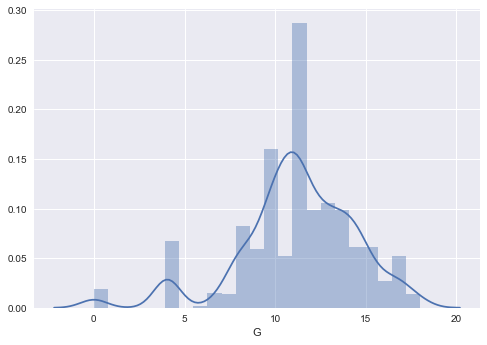

In [27]:
sns.distplot(INPUTdf.G)

Distribution of estimated final grade (G) based on which course a student is taking (Subject).

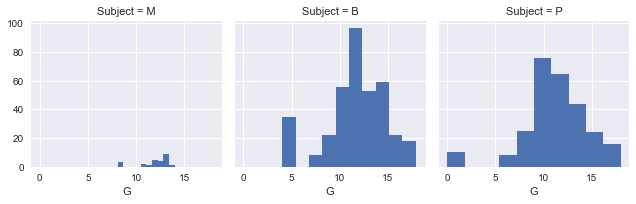

In [28]:
g = sns.FacetGrid(INPUTdf, col='Subject')
g.map(plt.hist, 'G')

Daily alcohol consumption level, Aalc vs estimated final grade, G.

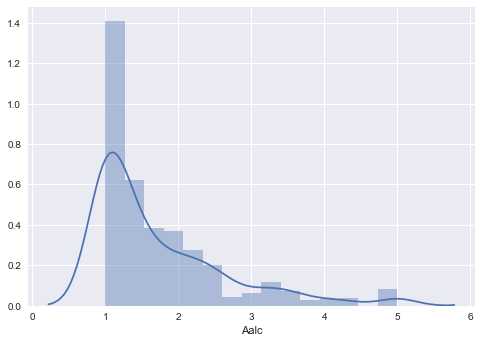

In [29]:
sns.distplot(INPUTdf.Aalc)

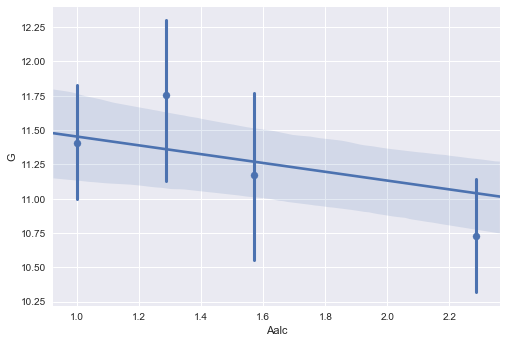

In [30]:
sns.regplot(x="Aalc", y="G", data=INPUTdf, x_bins=4)

Estimated score (G) distribution based on number of past failures.

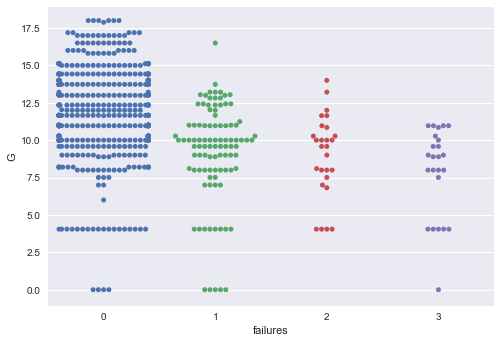

In [31]:
sns.swarmplot(x="failures", y="G", data=INPUTdf)

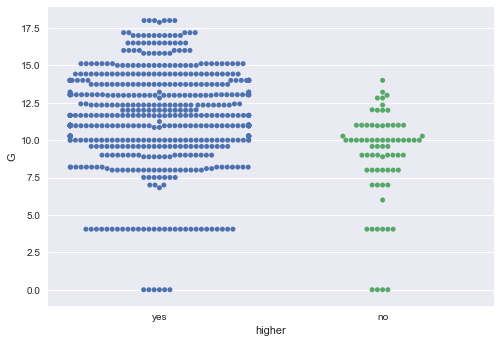

In [32]:
sns.swarmplot(x="higher", y="G", data=INPUTdf)

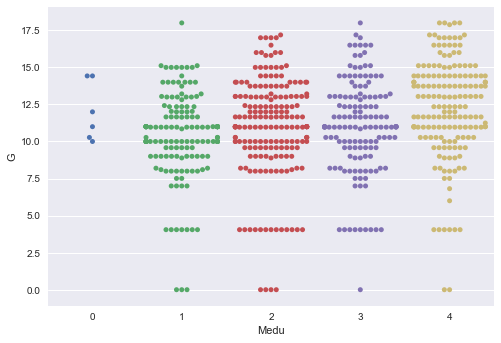

In [33]:
sns.swarmplot(x="Medu", y="G", data=INPUTdf)

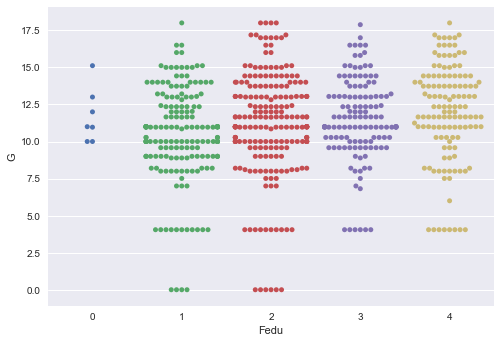

In [34]:
sns.swarmplot(x="Fedu", y="G", data=INPUTdf)

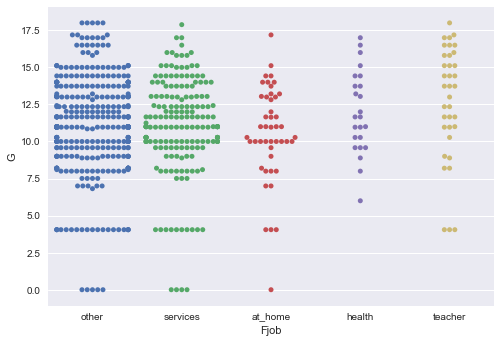

In [35]:
sns.swarmplot(x="Fjob", y="G", data=INPUTdf)

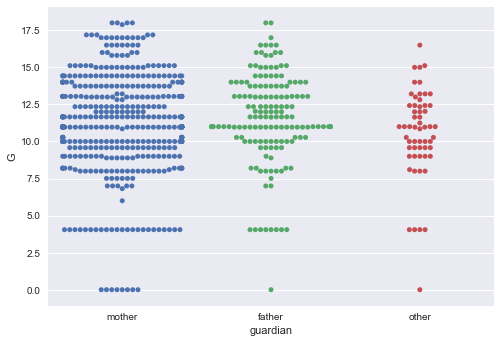

In [36]:
sns.swarmplot(x='guardian', y='G', data=INPUTdf)

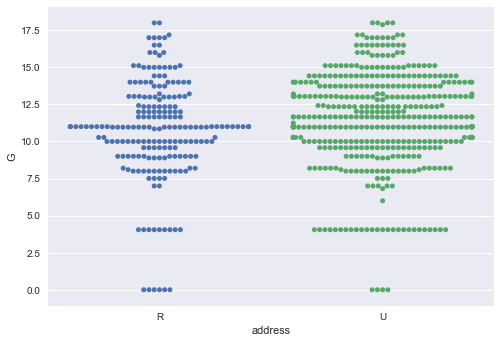

In [37]:
sns.swarmplot(x='address', y='G', data=INPUTdf)

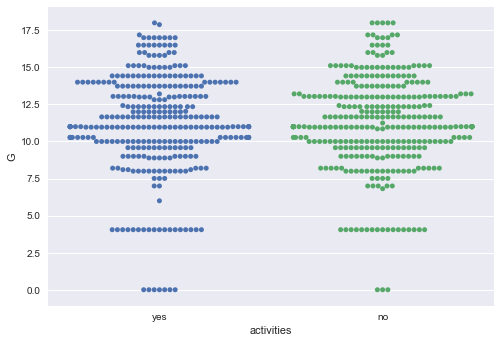

In [38]:
sns.swarmplot(x='activities', y='G', data=INPUTdf)

### Data Preparation for Modeling

Identify target variable y and predictor variables X.

In [39]:
y = INPUTdf['G']
X = INPUTdf[['Fedu','Fjob', 'Medu', 'Mjob', 'Pstatus', 'Subject', 'absences',
       'activities', 'address', 'age', 'failures', 'famrel', 'famsize',
       'famsup', 'freetime', 'goout', 'guardian', 'health', 'higher',
       'internet', 'nursery', 'reason', 'romantic', 'school', 'schoolsup',
       'sex', 'studytime', 'traveltime', 'Aalc']]

Convert dummy variables values into 0/1.

In [40]:
X.school = X['school'].replace(['GP', 'MS'], [1,0])
X.sex = X['sex'].replace(['F','M'],[1,0])
X.address = X['address'].replace(['U','R'], [1,0])
X.famsize = X['famsize'].replace(['LE3','GT3'], [1,0])
X.Pstatus = X['Pstatus'].replace(['T','A'], [1,0])
X.schoolsup = X['schoolsup'].replace(['yes','no'],[1,0])
X.famsup = X['famsup'].replace(['yes','no'],[1,0])
X.activities = X['activities'].replace(['yes','no'],[1,0])
X.nursery = X['nursery'].replace(['yes','no'],[1,0])
X.higher = X['higher'].replace(['yes','no'],[1,0])
X.internet = X['internet'].replace(['yes','no'],[1,0])
X.romantic = X['romantic'].replace(['yes','no'],[1,0])

/Users/jinghao/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:2999: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Dummy code any nominal variables in X.

In [41]:
#Identify norminal variables
norminal_vars = ['Fjob', 'Mjob', 'Subject', 'reason','guardian']
#Convert norminal variables to dummy variables
X = pd.get_dummies(X, columns= norminal_vars, drop_first=True)
# Show the dummy coded dataframe
X.head()

,Fedu,Medu,Pstatus,absences,activities,address,age,failures,famrel,famsize,...,Mjob_other,Mjob_services,Mjob_teacher,Subject_M,Subject_P,reason_home,reason_other,reason_reputation,guardian_mother,guardian_other
128,2,2,1,0,1,0,18,2,3,0,...,0,1,0,1,0,0,0,1,1,0
161,2,3,1,6,0,0,15,2,4,0,...,1,0,0,1,0,0,0,0,1,0
162,2,1,1,0,1,1,16,1,4,1,...,1,0,0,1,0,0,0,0,1,0
163,3,1,1,2,0,1,17,0,5,0,...,0,0,0,1,0,0,0,0,0,0
165,2,3,1,16,1,1,16,1,4,0,...,0,1,0,1,0,0,0,0,1,0


Split data into training and test data sets.

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

#### Decision Tree

In [99]:
from sklearn.tree import DecisionTreeRegressor
max_depths = range(1,100)
score = pd.DataFrame(columns=['max_depth','train_score','test_score'])
for i in max_depths:
    tree = DecisionTreeRegressor(max_depth = i).fit(X_train, y_train)
    train_score = tree.score(X_train, y_train)
    test_score = tree.score(X_test, y_test)
    row = pd.Series({'max_depth': i, 'train_score': train_score, 'test_score': test_score})
    score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', ascending=False, inplace=True)
score.head(10)

,max_depth,train_score,test_score
1,2.0,0.212728,0.195423
2,3.0,0.282242,0.158937
0,1.0,0.135562,0.135798
3,4.0,0.342385,0.095390
4,5.0,0.454282,-0.046606
5,6.0,0.567066,-0.156469
6,7.0,0.653406,-0.263482
7,8.0,0.742237,-0.386917
93,94.0,1.000000,-0.454035
77,78.0,1.000000,-0.454413


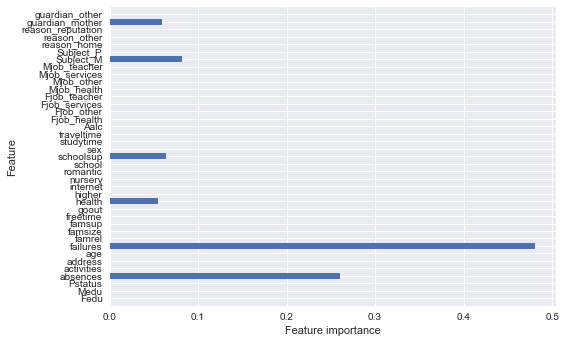

In [44]:
tree = DecisionTreeRegressor(max_depth=3).fit(X_train, y_train)
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances(tree)

#### Random Forest

In [49]:
from sklearn.ensemble import RandomForestRegressor
max_depth = range(1,20)
n_estimators = 1000
score = pd.DataFrame(columns=['max_depth', 'train_score','test_score'])
for i in max_depth:
    forest = RandomForestRegressor(random_state=0, max_depth=i, n_estimators= n_estimators).fit(X_train, y_train)
    train_score = forest.score(X_train, y_train)
    test_score = forest.score(X_test, y_test)
    row = pd.Series({'max_depth': i, 'train_score': train_score, 'test_score': test_score})        
    score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', inplace=True, ascending=False)
score.head()

,max_depth,train_score,test_score
5,6.0,0.603140,0.235495
7,8.0,0.742210,0.233255
6,7.0,0.678958,0.232953
15,16.0,0.889820,0.232396
13,14.0,0.885453,0.232122


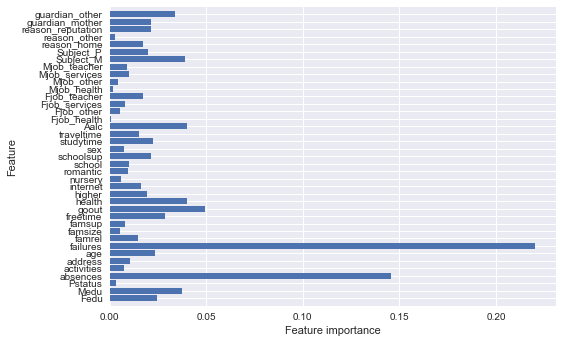

In [97]:
plot_feature_importances(RandomForestRegressor(random_state=0, max_depth=6, n_estimators=1000).fit(X_train, y_train))

#### Gradient Boosting Machines

In [54]:
from sklearn.ensemble import GradientBoostingRegressor
max_depth = range(1,6)
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9]
n_estimators = [10, 100, 1000]
score = pd.DataFrame(columns=['max_depth', 'learning_rate', 'n_estimator', 'train_score','test_score'])
for i in max_depth:
    for j in learning_rate:
        for k in n_estimators:
            gbrt = GradientBoostingRegressor(max_depth=i, learning_rate=j, n_estimators=k).fit(X_train, y_train)
            train_score = gbrt.score(X_train, y_train)
            test_score = gbrt.score(X_test, y_test)
            row = pd.Series({'max_depth': i, 'learning_rate':j, 'n_estimator':k, 'train_score': train_score, 'test_score': test_score})        
            score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', inplace=True, ascending=False)
score.head()

,max_depth,learning_rate,n_estimator,train_score,test_score
51,3.0,0.4,10.0,0.538107,0.231755
36,2.0,0.7,10.0,0.405809,0.229164
22,2.0,0.1,100.0,0.464373,0.219053
13,1.0,0.5,100.0,0.352138,0.217874
10,1.0,0.4,100.0,0.339257,0.217608


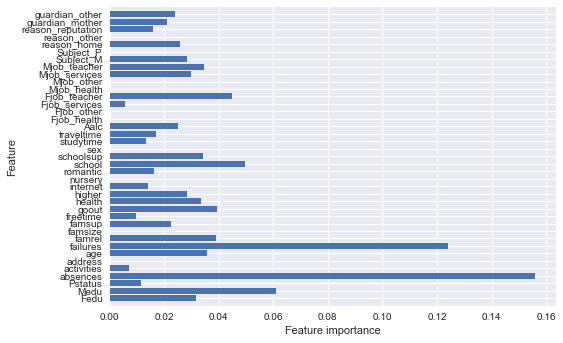

In [101]:
plot_feature_importances(GradientBoostingRegressor(max_depth=3, n_estimators=10, learning_rate=0.4).fit(X_train, y_train))

Preprocessing for SVR.

In [55]:
#Split X_train and X_test into sub dataframes consists of dummy columns only and non-dummy columns only
X_train_nondummies = X_train[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
X_train_dummies = X_train[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Subject_M', 'Subject_P',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']]
X_test_nondummies = X_test[['Fedu', 'Medu', 'absences',  'age',
       'failures', 'famrel', 'freetime', 'goout',
       'health', 'studytime', 'traveltime', 'Aalc']]
X_test_dummies = X_test[['Pstatus','activities', 'address','famsize', 'famsup','higher', 'internet', 'nursery', 'romantic', 'school',
       'schoolsup', 'sex', 'Fjob_health',
       'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'Mjob_health',
       'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Subject_M', 'Subject_P',
       'reason_home', 'reason_other', 'reason_reputation', 'guardian_mother',
       'guardian_other']]

scaler = MinMaxScaler()
scaler.fit(X_train_nondummies)

X_train_nondummies_scaled = scaler.transform(X_train_nondummies)
X_train_scaled = np.concatenate((X_train_nondummies_scaled, X_train_dummies.values), axis=1)

X_test_nondummies_scaled = scaler.transform(X_test_nondummies) 
X_test_scaled= np.concatenate((X_test_nondummies_scaled, X_test_dummies.values), axis=1)

#### SVR

In [56]:
from sklearn.svm import SVR
score = pd.DataFrame(columns=['gamma','C','train_score','test_score'])
for gamma in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
    for C in [1e-3,1e-1,1e0,1e1,1e10,1e50]:
        svr = SVR(kernel='rbf', gamma=gamma, C=C)
        svr.fit(X_train_scaled, y_train)
        train_score = svr.score(X_train_scaled, y_train)
        test_score = svr.score(X_test_scaled, y_test)
        row = pd.Series({'gamma':gamma, 'C':C, 'train_score':train_score,'test_score':test_score})
        score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', ascending=False, inplace=True)
score.head()

,gamma,C,train_score,test_score
9,0.100,10.0,0.671253,0.174026
8,0.100,1.0,0.251056,0.149322
3,0.001,10.0,0.096125,0.092093
7,0.100,0.1,0.064428,0.050648
15,1.000,10.0,0.997558,0.027247


#### KNN

In [57]:
from sklearn.neighbors import KNeighborsRegressor
neighbors_settings = range(1, 100)
score = pd.DataFrame(columns=['n_neighbors','train_score','test_score'])
for n_neighbor in neighbors_settings:
    reg = KNeighborsRegressor (n_neighbors=n_neighbor)
    reg.fit(X_train_scaled, y_train)
    train_score = reg.score(X_train_scaled, y_train)
    test_score = reg.score(X_test_scaled, y_test)
    row = pd.Series({'n_neighbors':n_neighbor, 'train_score':train_score,'test_score':test_score})
    score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', ascending=False, inplace=True)
score.head()

,n_neighbors,train_score,test_score
23,24.0,0.118118,0.131833
25,26.0,0.110656,0.130940
7,8.0,0.218603,0.129483
11,12.0,0.169795,0.128853
24,25.0,0.112961,0.128395


#### Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression().fit(X_train_scaled, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train_scaled, y_train)))
print("test set score: {:.2f}".format(lr.score(X_test_scaled, y_test)))
# cv_score(lr, X_train_standard, y_train, cv=5)

Training set score: 0.27
test set score: 0.12


Ridge Regression (L2 regulation).

In [61]:
from sklearn.linear_model import Ridge
alpha = [0.01, 0.1, 1, 10, 100]
score = pd.DataFrame(columns=['alpha','train_score','test_score'])
for i in alpha:
    ridge = Ridge(alpha=i).fit(X_train_scaled, y_train)
    train_score = ridge.score(X_train_scaled, y_train)
    test_score = ridge.score(X_test_scaled, y_test)
    row = pd.Series({'alpha':i, 'train_score': train_score, 'test_score': test_score})
    score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', ascending=False, inplace=True)
score.head()

,alpha,train_score,test_score
3,10.00,0.246628,0.176497
2,1.00,0.267919,0.135436
1,0.10,0.268598,0.119786
0,0.01,0.268607,0.117880
4,100.00,0.138438,0.114205


Lasso Regression (L1 regulation).

In [64]:
from sklearn.linear_model import Lasso
alpha = [0.001, 0.01, 0.1, 1, 10, 100]
score = pd.DataFrame(columns=['alpha','train_score','test_score'])
for i in alpha:
    lasso = Lasso(alpha=i).fit(X_train_scaled, y_train)
    train_score = lasso.score(X_train_scaled, y_train)
    test_score = lasso.score(X_test_scaled, y_test)
    row = pd.Series({'alpha':i, 'train_score': train_score, 'test_score': test_score})
    score = score.append(row, ignore_index=True)
score.sort_values(by='test_score', ascending=False, inplace=True)
score.head()

,alpha,train_score,test_score
1,0.010,0.262541,0.154755
2,0.100,0.146955,0.132196
0,0.001,0.268514,0.123379
3,1.000,0.000000,-0.003215
4,10.000,0.000000,-0.003215
